In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import hamming_loss
import tensorflow as tf
from feature_extractor import fingerprint_features

from classifiers.model1 import FeatureExtractedClassifier
from classifiers.model2 import SmilePredictor
from get_data import fetch_single_label_data, fetch_multi_label_data
from utils import plot_cm, plot_metrics

# Model 1

In [3]:
def preprocess_smile(s):
    s = str(s)
    extracted_features = np.array(fingerprint_features(s, size=2048))
    extracted_features = extracted_features.reshape(1, -1)
    return extracted_features

In [4]:
# we use class weight since the data is imbalanced
# the following class weights is calculated in the data_exploration file
class_weight = {0: 2.81, 1: 0.61}
print(f"class weights: {class_weight}")

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')
]

class weights: {0: 2.81, 1: 0.61}


In [5]:
X_train, X_test, y_train, y_test = fetch_single_label_data(
    get_extracted_features=True)

In [8]:
clf = FeatureExtractedClassifier(epochs=100,
                                 batch_size=16,
                                 metrics=METRICS,
                                 optimizer=tf.keras.optimizers.Adam(lr=1e-5),
                                 class_weight=class_weight
                                 )

In [9]:
clf.fit(X_train, y_train)

Train on 3199 samples, validate on 800 samples
Epoch 1/100
3199/3199 - 3s - loss: 1.0664 - accuracy: 0.4789 - precision: 0.4789 - recall: 0.4789 - auc: 0.4798 - val_loss: 0.6909 - val_accuracy: 0.4375 - val_precision: 0.4375 - val_recall: 0.4375 - val_auc: 0.3806
Epoch 2/100
3199/3199 - 1s - loss: 1.0422 - accuracy: 0.4845 - precision: 0.4845 - recall: 0.4845 - auc: 0.4832 - val_loss: 0.7074 - val_accuracy: 0.4187 - val_precision: 0.4187 - val_recall: 0.4187 - val_auc: 0.3628
Epoch 3/100
3199/3199 - 1s - loss: 1.0168 - accuracy: 0.4939 - precision: 0.4939 - recall: 0.4939 - auc: 0.4961 - val_loss: 0.7320 - val_accuracy: 0.4025 - val_precision: 0.4025 - val_recall: 0.4025 - val_auc: 0.3447
Epoch 4/100
3199/3199 - 1s - loss: 1.0255 - accuracy: 0.4942 - precision: 0.4942 - recall: 0.4942 - auc: 0.4916 - val_loss: 0.7333 - val_accuracy: 0.4112 - val_precision: 0.4112 - val_recall: 0.4112 - val_auc: 0.3584
Epoch 5/100
3199/3199 - 1s - loss: 0.9308 - accuracy: 0.4995 - precision: 0.4995 - re

Epoch 39/100
3199/3199 - 1s - loss: 0.7287 - accuracy: 0.5605 - precision: 0.5605 - recall: 0.5605 - auc: 0.5902 - val_loss: 0.6469 - val_accuracy: 0.5688 - val_precision: 0.5688 - val_recall: 0.5688 - val_auc: 0.5658
Epoch 40/100
3199/3199 - 1s - loss: 0.6962 - accuracy: 0.5896 - precision: 0.5896 - recall: 0.5896 - auc: 0.6182 - val_loss: 0.6471 - val_accuracy: 0.5625 - val_precision: 0.5625 - val_recall: 0.5625 - val_auc: 0.5489
Epoch 41/100
3199/3199 - 1s - loss: 0.6735 - accuracy: 0.5921 - precision: 0.5921 - recall: 0.5921 - auc: 0.6305 - val_loss: 0.6462 - val_accuracy: 0.5650 - val_precision: 0.5650 - val_recall: 0.5650 - val_auc: 0.5551
Epoch 42/100
3199/3199 - 1s - loss: 0.6949 - accuracy: 0.5861 - precision: 0.5861 - recall: 0.5861 - auc: 0.6206 - val_loss: 0.6467 - val_accuracy: 0.5625 - val_precision: 0.5625 - val_recall: 0.5625 - val_auc: 0.5579
Epoch 43/100
3199/3199 - 1s - loss: 0.6852 - accuracy: 0.5924 - precision: 0.5924 - recall: 0.5924 - auc: 0.6270 - val_loss: 0.6

Epoch 77/100
3199/3199 - 1s - loss: 0.5683 - accuracy: 0.6752 - precision: 0.6752 - recall: 0.6752 - auc: 0.7288 - val_loss: 0.6338 - val_accuracy: 0.6587 - val_precision: 0.6587 - val_recall: 0.6587 - val_auc: 0.6560
Epoch 78/100
3199/3199 - 1s - loss: 0.5505 - accuracy: 0.6880 - precision: 0.6880 - recall: 0.6880 - auc: 0.7437 - val_loss: 0.6326 - val_accuracy: 0.6662 - val_precision: 0.6662 - val_recall: 0.6662 - val_auc: 0.6643
Epoch 79/100
3199/3199 - 1s - loss: 0.5639 - accuracy: 0.6883 - precision: 0.6883 - recall: 0.6883 - auc: 0.7355 - val_loss: 0.6329 - val_accuracy: 0.6587 - val_precision: 0.6587 - val_recall: 0.6587 - val_auc: 0.6598
Epoch 80/100
3199/3199 - 1s - loss: 0.5421 - accuracy: 0.6905 - precision: 0.6905 - recall: 0.6905 - auc: 0.7488 - val_loss: 0.6318 - val_accuracy: 0.6675 - val_precision: 0.6675 - val_recall: 0.6675 - val_auc: 0.6668
Epoch 81/100
3199/3199 - 1s - loss: 0.5521 - accuracy: 0.6849 - precision: 0.6849 - recall: 0.6849 - auc: 0.7443 - val_loss: 0.6

FeatureExtractedClassifier(activation='relu', batch_size=16,
                           class_weight={0: 2.81, 1: 0.61}, epochs=100,
                           is_multi_label=False,
                           loss='categorical_crossentropy',
                           metrics=[<tensorflow.python.keras.metrics.BinaryAccuracy object at 0x0000015F20EF69B0>,
                           optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000015F288CB2E8>,
                           output_activation='softmax', validation_split=0.2)

loss : 0.6183
accuracy : 0.7010
precision : 0.7010
recall : 0.7010
auc : 0.7319


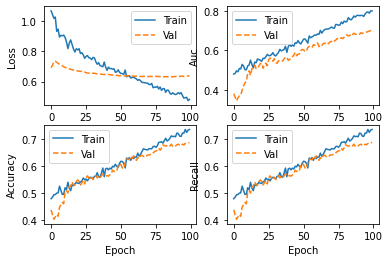

In [10]:
# Evaluation

plot_metrics(clf.history)

results = clf.history.model.evaluate(X_test, y_test, verbose=0)
for name, value in zip(clf.history.model.metrics_names, results):
    print(f"{name} : {value:.4f}")

              precision    recall  f1-score   support

           0       0.30      0.51      0.38       178
           1       0.88      0.74      0.80       822

    accuracy                           0.70      1000
   macro avg       0.59      0.63      0.59      1000
weighted avg       0.77      0.70      0.73      1000



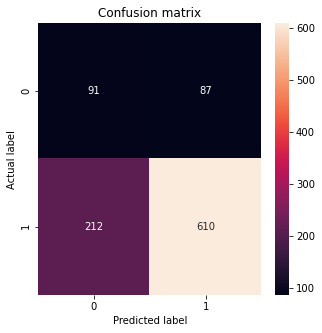

In [11]:
test_pred = clf.predict(X_test)
plot_cm(y_test, test_pred)
plt.show()

In [9]:
# save model1
# clf.history.model.save("saved_models/model1.h5")

# Model2

In [10]:
X_train, X_test, y_train, y_test = fetch_single_label_data(
    get_extracted_features=False)

In [11]:
clf2 = SmilePredictor(epochs=150,
                      batch_size=16,
                      loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,
                                                        momentum=0.0,
                                                        nesterov=False),
                      metrics=METRICS,
                      class_weight=class_weight,
                      validation_split=0.2
                      )

In [12]:
clf2.fit(X_train, y_train)

Train on 3199 samples, validate on 800 samples
Epoch 1/150
3199/3199 - 5s - loss: 0.6982 - accuracy: 0.2332 - precision: 0.9200 - recall: 0.0702 - auc: 0.5469 - val_loss: 0.6767 - val_accuracy: 0.4725 - val_precision: 0.8882 - val_recall: 0.4180 - val_auc: 0.5767
Epoch 2/150
3199/3199 - 2s - loss: 0.6950 - accuracy: 0.3914 - precision: 0.8562 - recall: 0.3090 - auc: 0.5538 - val_loss: 0.6756 - val_accuracy: 0.4663 - val_precision: 0.8814 - val_recall: 0.4135 - val_auc: 0.5803
Epoch 3/150
3199/3199 - 3s - loss: 0.6943 - accuracy: 0.4598 - precision: 0.8604 - recall: 0.4067 - auc: 0.5538 - val_loss: 0.6744 - val_accuracy: 0.4900 - val_precision: 0.8768 - val_recall: 0.4496 - val_auc: 0.5827
Epoch 4/150
3199/3199 - 3s - loss: 0.6929 - accuracy: 0.4942 - precision: 0.8559 - recall: 0.4601 - auc: 0.5604 - val_loss: 0.6740 - val_accuracy: 0.4688 - val_precision: 0.8822 - val_recall: 0.4165 - val_auc: 0.5873
Epoch 5/150
3199/3199 - 2s - loss: 0.6921 - accuracy: 0.4605 - precision: 0.8543 - re

Epoch 39/150
3199/3199 - 2s - loss: 0.6790 - accuracy: 0.5464 - precision: 0.8721 - recall: 0.5231 - auc: 0.6258 - val_loss: 0.6574 - val_accuracy: 0.6150 - val_precision: 0.8940 - val_recall: 0.6090 - val_auc: 0.6507
Epoch 40/150
3199/3199 - 2s - loss: 0.6793 - accuracy: 0.6099 - precision: 0.8650 - recall: 0.6208 - auc: 0.6260 - val_loss: 0.6593 - val_accuracy: 0.5175 - val_precision: 0.9020 - val_recall: 0.4707 - val_auc: 0.6519
Epoch 41/150
3199/3199 - 2s - loss: 0.6793 - accuracy: 0.5599 - precision: 0.8719 - recall: 0.5425 - auc: 0.6247 - val_loss: 0.6584 - val_accuracy: 0.5288 - val_precision: 0.9045 - val_recall: 0.4842 - val_auc: 0.6535
Epoch 42/150
3199/3199 - 2s - loss: 0.6782 - accuracy: 0.5686 - precision: 0.8772 - recall: 0.5506 - auc: 0.6290 - val_loss: 0.6578 - val_accuracy: 0.5487 - val_precision: 0.9064 - val_recall: 0.5098 - val_auc: 0.6544
Epoch 43/150
3199/3199 - 2s - loss: 0.6784 - accuracy: 0.5442 - precision: 0.8749 - recall: 0.5177 - auc: 0.6277 - val_loss: 0.6

Epoch 77/150
3199/3199 - 2s - loss: 0.6709 - accuracy: 0.5777 - precision: 0.8753 - recall: 0.5651 - auc: 0.6499 - val_loss: 0.6490 - val_accuracy: 0.5663 - val_precision: 0.9015 - val_recall: 0.5368 - val_auc: 0.6802
Epoch 78/150
3199/3199 - 2s - loss: 0.6715 - accuracy: 0.5952 - precision: 0.8771 - recall: 0.5883 - auc: 0.6493 - val_loss: 0.6482 - val_accuracy: 0.5900 - val_precision: 0.8983 - val_recall: 0.5714 - val_auc: 0.6805
Epoch 79/150
3199/3199 - 2s - loss: 0.6713 - accuracy: 0.5811 - precision: 0.8792 - recall: 0.5666 - auc: 0.6476 - val_loss: 0.6473 - val_accuracy: 0.6125 - val_precision: 0.8971 - val_recall: 0.6030 - val_auc: 0.6802
Epoch 80/150
3199/3199 - 2s - loss: 0.6714 - accuracy: 0.5849 - precision: 0.8774 - recall: 0.5734 - auc: 0.6471 - val_loss: 0.6469 - val_accuracy: 0.6438 - val_precision: 0.9008 - val_recall: 0.6421 - val_auc: 0.6786
Epoch 81/150
3199/3199 - 2s - loss: 0.6694 - accuracy: 0.6058 - precision: 0.8812 - recall: 0.5998 - auc: 0.6537 - val_loss: 0.6

Epoch 115/150
3199/3199 - 3s - loss: 0.6652 - accuracy: 0.5908 - precision: 0.8823 - recall: 0.5776 - auc: 0.6594 - val_loss: 0.6408 - val_accuracy: 0.6288 - val_precision: 0.9000 - val_recall: 0.6226 - val_auc: 0.6922
Epoch 116/150
3199/3199 - 4s - loss: 0.6664 - accuracy: 0.6149 - precision: 0.8781 - recall: 0.6154 - auc: 0.6562 - val_loss: 0.6433 - val_accuracy: 0.5663 - val_precision: 0.9077 - val_recall: 0.5323 - val_auc: 0.6930
Epoch 117/150
3199/3199 - 4s - loss: 0.6643 - accuracy: 0.5980 - precision: 0.8821 - recall: 0.5879 - auc: 0.6626 - val_loss: 0.6408 - val_accuracy: 0.6275 - val_precision: 0.8998 - val_recall: 0.6211 - val_auc: 0.6925
Epoch 118/150
3199/3199 - 3s - loss: 0.6636 - accuracy: 0.5986 - precision: 0.8835 - recall: 0.5876 - auc: 0.6652 - val_loss: 0.6410 - val_accuracy: 0.6087 - val_precision: 0.8982 - val_recall: 0.5970 - val_auc: 0.6923
Epoch 119/150
3199/3199 - 2s - loss: 0.6644 - accuracy: 0.5939 - precision: 0.8825 - recall: 0.5818 - auc: 0.6624 - val_loss

SmilePredictor(activation='relu', batch_size=16,
               class_weight={0: 2.81, 1: 0.61}, epochs=150,
               loss='binary_crossentropy', max_length=74,
               metrics=[<tensorflow.python.keras.metrics.BinaryAccuracy object at 0x0000019DBC148978>,
               optimizer=<tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000019DC59FB400>,
               validation_split=0.2)

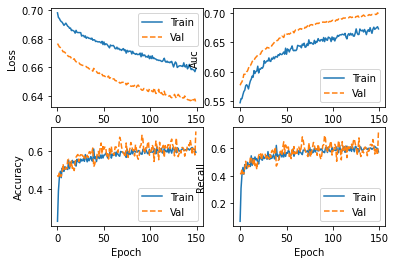

In [13]:
# Evaluation

plot_metrics(clf2.history)

              precision    recall  f1-score   support

           0       0.24      0.46      0.32       178
           1       0.85      0.69      0.76       822

    accuracy                           0.65      1000
   macro avg       0.55      0.57      0.54      1000
weighted avg       0.75      0.65      0.68      1000



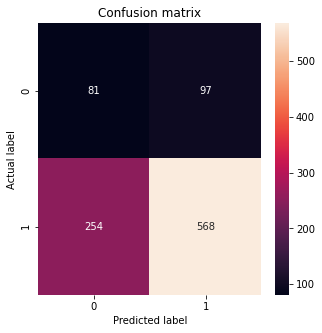

In [14]:
test_pred = clf2.predict(X_test)
plot_cm(y_test, test_pred)
plt.show()

In [15]:
# Precict 
smile = 'Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C'
print(f"smile property prediction: P1={clf2.predict(smile)}")

smile property prediction: P1=[[1]]


In [16]:
# save model1
# clf2.history.model.save("saved_models/model2.h5")

# Model3

In [17]:
X_train, X_test, y_train, y_test = fetch_multi_label_data(
    get_extracted_features=True)

#### We should claculate  class_weight for all the P1, P2, ..., P9 and pass it to the model to get better results. 

In [18]:
clf3 = FeatureExtractedClassifier(epochs=50,
                                 batch_size=16,
                                 metrics=METRICS,
                                 loss='binary_crossentropy',
                                 output_activation='sigmoid',
                                 optimizer=tf.keras.optimizers.Adam(lr=1e-5),
                                 # class_weight=class_weight,
                                 is_multi_label=True
                                 )

In [19]:
clf3.fit(X_train, y_train)

Train on 3199 samples, validate on 800 samples
Epoch 1/50
3199/3199 - 4s - loss: 0.8868 - accuracy: 0.5075 - precision: 0.8364 - recall: 0.5102 - auc: 0.5044 - val_loss: 0.6828 - val_accuracy: 0.5729 - val_precision: 0.8289 - val_recall: 0.6136 - val_auc: 0.4944
Epoch 2/50
3199/3199 - 1s - loss: 0.8704 - accuracy: 0.5074 - precision: 0.8377 - recall: 0.5089 - auc: 0.5049 - val_loss: 0.6636 - val_accuracy: 0.6139 - val_precision: 0.8327 - val_recall: 0.6710 - val_auc: 0.4971
Epoch 3/50
3199/3199 - 1s - loss: 0.8546 - accuracy: 0.5088 - precision: 0.8353 - recall: 0.5132 - auc: 0.4993 - val_loss: 0.6574 - val_accuracy: 0.6208 - val_precision: 0.8342 - val_recall: 0.6797 - val_auc: 0.4979
Epoch 4/50
3199/3199 - 1s - loss: 0.8353 - accuracy: 0.5141 - precision: 0.8358 - recall: 0.5206 - auc: 0.5010 - val_loss: 0.6540 - val_accuracy: 0.6281 - val_precision: 0.8348 - val_recall: 0.6897 - val_auc: 0.4978
Epoch 5/50
3199/3199 - 1s - loss: 0.8276 - accuracy: 0.5128 - precision: 0.8364 - recall:

Epoch 39/50
3199/3199 - 1s - loss: 0.6780 - accuracy: 0.6055 - precision: 0.8431 - recall: 0.6483 - auc: 0.5322 - val_loss: 0.6161 - val_accuracy: 0.7410 - val_precision: 0.8375 - val_recall: 0.8547 - val_auc: 0.5342
Epoch 40/50
3199/3199 - 1s - loss: 0.6771 - accuracy: 0.6088 - precision: 0.8454 - recall: 0.6506 - auc: 0.5331 - val_loss: 0.6161 - val_accuracy: 0.7418 - val_precision: 0.8374 - val_recall: 0.8560 - val_auc: 0.5343
Epoch 41/50
3199/3199 - 1s - loss: 0.6724 - accuracy: 0.6110 - precision: 0.8450 - recall: 0.6543 - auc: 0.5369 - val_loss: 0.6144 - val_accuracy: 0.7436 - val_precision: 0.8376 - val_recall: 0.8585 - val_auc: 0.5351
Epoch 42/50
3199/3199 - 1s - loss: 0.6705 - accuracy: 0.6213 - precision: 0.8476 - recall: 0.6665 - auc: 0.5412 - val_loss: 0.6152 - val_accuracy: 0.7443 - val_precision: 0.8375 - val_recall: 0.8597 - val_auc: 0.5356
Epoch 43/50
3199/3199 - 1s - loss: 0.6692 - accuracy: 0.6203 - precision: 0.8448 - recall: 0.6681 - auc: 0.5409 - val_loss: 0.6137 -

FeatureExtractedClassifier(activation='relu', batch_size=16, class_weight=None,
                           epochs=50, is_multi_label=True,
                           loss='binary_crossentropy',
                           metrics=[<tensorflow.python.keras.metrics.BinaryAccuracy object at 0x0000019DBC148978>,
                           optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000019DC80943C8>,
                           output_activation='sigmoid', validation_split=0.2)

loss : 0.6116
accuracy : 0.7569
precision : 0.8330
recall : 0.8855
auc : 0.5243


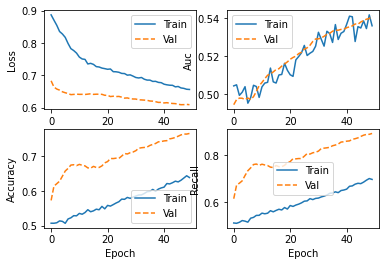

In [20]:
plot_metrics(clf3.history)

results = clf3.history.model.evaluate(X_test, y_test, verbose=0)
for name, value in zip(clf3.history.model.metrics_names, results):
    print(f"{name} : {value:.4f}")

hamming loss: 0.2431
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       822
           1       0.11      0.11      0.11       127
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3

    accuracy                           0.73      1000
   macro avg       0.16      0.16      0.16      1000
weighted avg       0.69      0.73      0.71      1000



C:\Users\user\miniconda3\envs\test\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


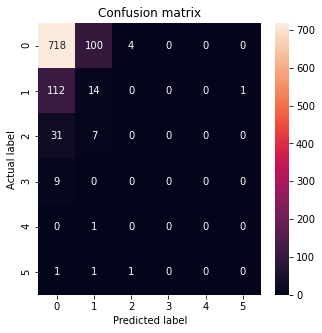

In [21]:
test_pred = clf3.predict(X_test)
hamming_loss = hamming_loss(y_test, test_pred)
print(f"hamming loss: {hamming_loss:.4f}")
plot_cm(y_test, test_pred)
plt.show()

In [22]:
# save model1
# clf3.history.model.save("saved_models/model3.h5")